In [ ]:
!nvidia-smi

In [ ]:
!pwd

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install --upgrade albumentations # 사용하려는 버전으로 변경

In [1]:
import sys
sys.path.append("/aiffel/aiffel/visuworks/Blindless_AIFFELTON/Models") 
sys.path.append("/aiffel/aiffel/visuworks/Blindless_AIFFELTON/Models/Dense_Unet")
import tensorflow as tf

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train
import model

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'Dense_Unet_30ep_1024_fG'
INPUT_SHAPE = (1024, 1024, 1)

sys.path.append("/aiffel/aiffel/visuworks/Blindless_AIFFELTON/Models") 
sys.path.append("/aiffel/aiffel/visuworks/Blindless_AIFFELTON/Models/Dense_Unet")

MODEL_PATH = '/aiffel/aiffel/visuworks/Blindless_AIFFELTON/Models/Dense_Unet/model_parameters/' + FILE_NAME + ".h5"
HISTORY_PATH = '/aiffel/aiffel/visuworks/Blindless_AIFFELTON/Models/Dense_Unet/history/' + FILE_NAME + ".json"
SOURCE = '/aiffel/aiffel/visuworks/Selected Dataset 2'

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 48) 480         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 48) 192         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 48) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [2]:
import sys, json
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint 

# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}

# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0],is_train=False)

# Create train, test generator
train_generator = data_generator.FullSizedDataGenerator(
    SOURCE, 
    batch_size=1, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.FullSizedDataGenerator(
    SOURCE, 
    batch_size=1, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    augmentation= test_preproc
)

# Create model
model = model.build_model(INPUT_SHAPE)

In [ ]:
model.summary()

In [ ]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH)

In [3]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot history and pring evaluation of test dataset
metrics.print_evaluation(model, test_generator)
check_result.plot_history(HISTORY_PATH)

500/500 [==============================] - 199s 295ms/step - loss: 0.2526 - sensitivity: 0.7562 - specificity: 0.9758 - accuracy: 0.9619
Loss: 0.25258511304855347
Sensitivity: 0.7562231421470642
Specificity: 0.975791871547699
Accuracy: 0.9618997573852539


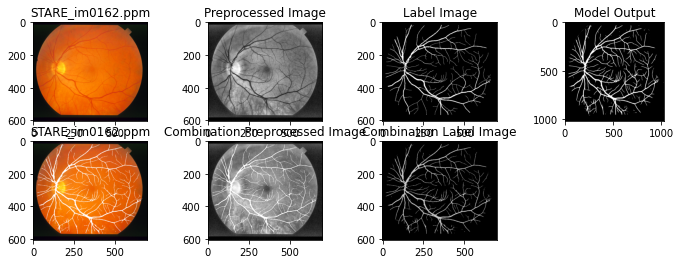

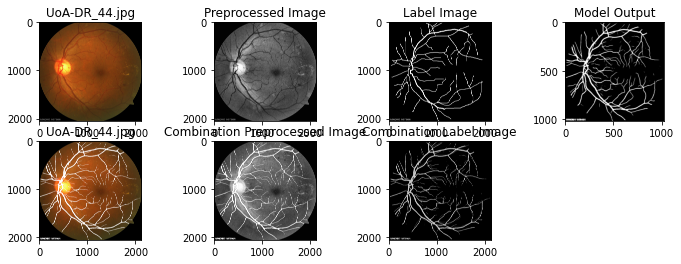

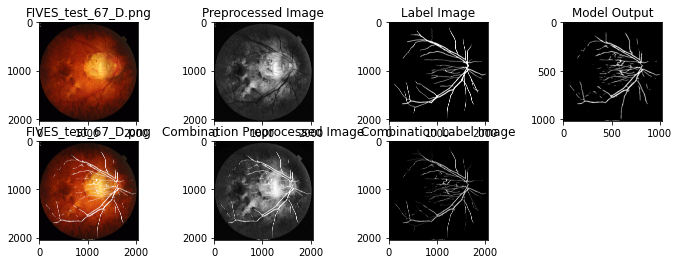

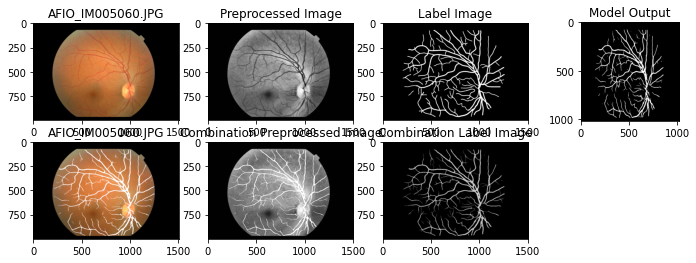

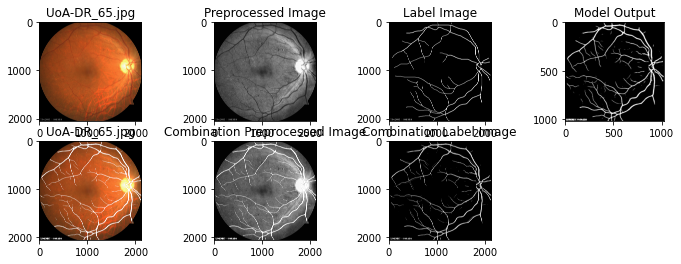

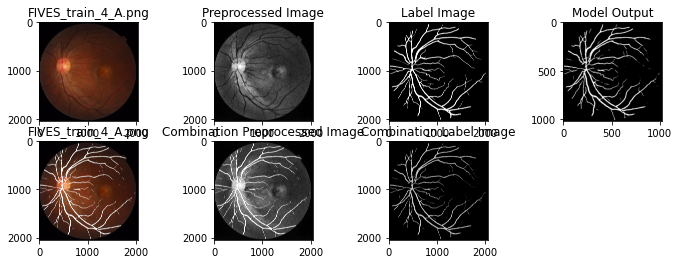

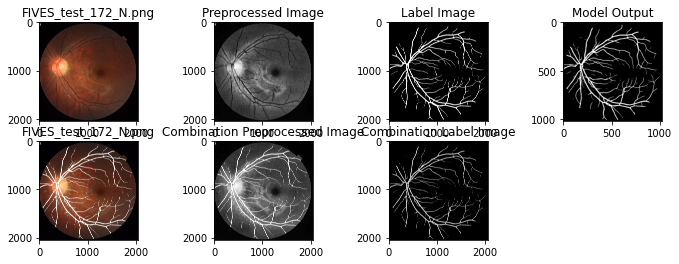

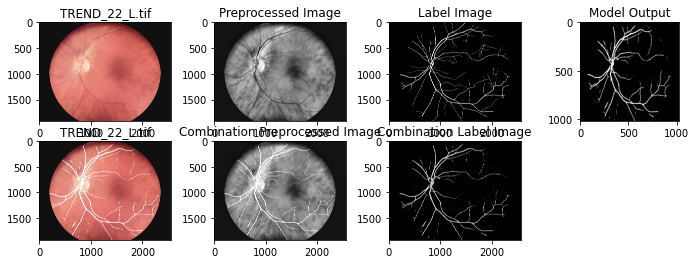

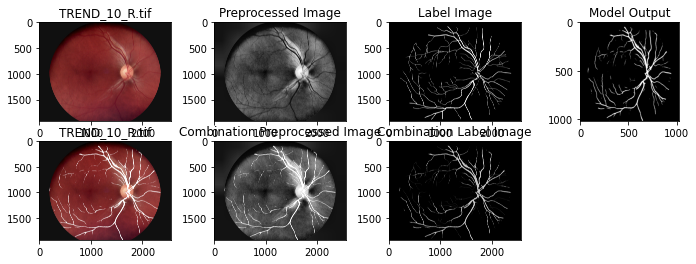

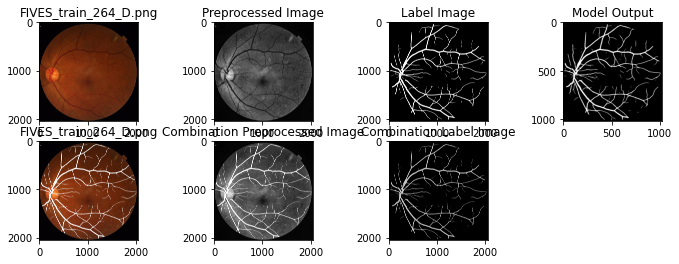

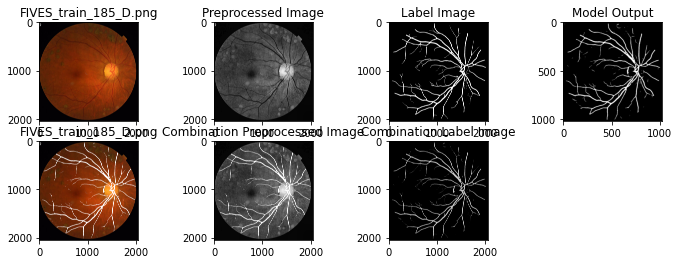

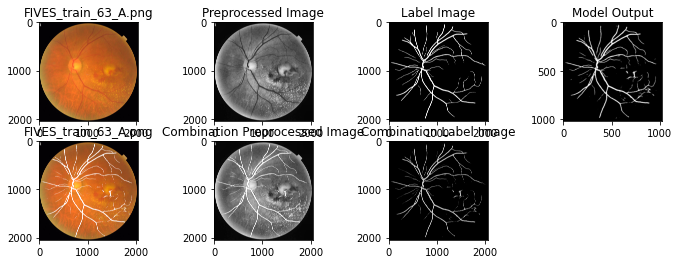

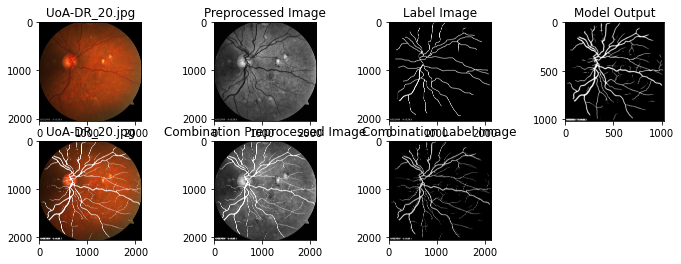

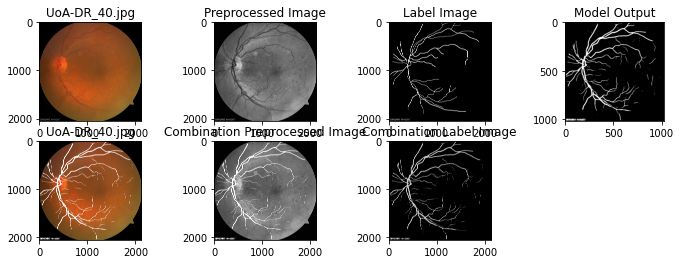

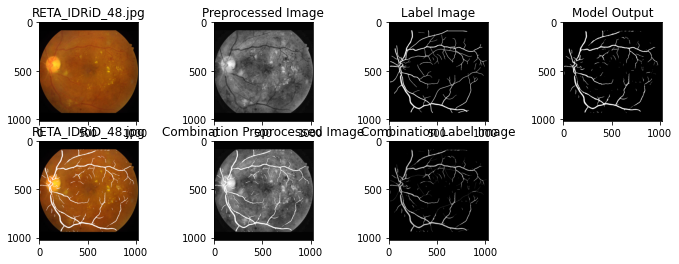

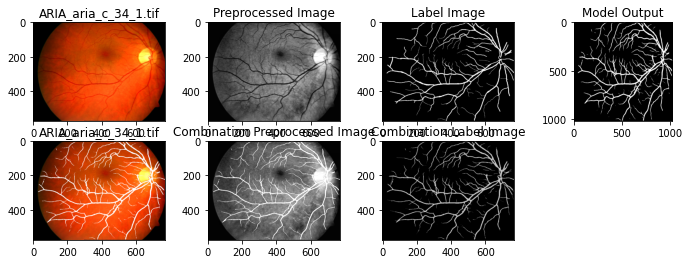

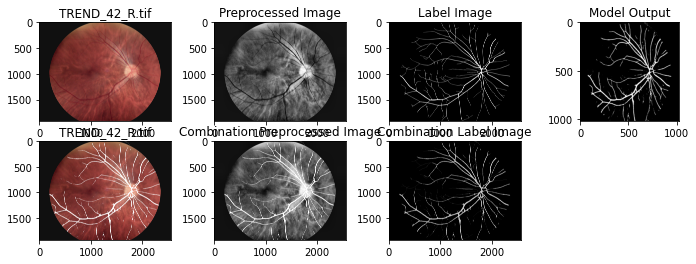

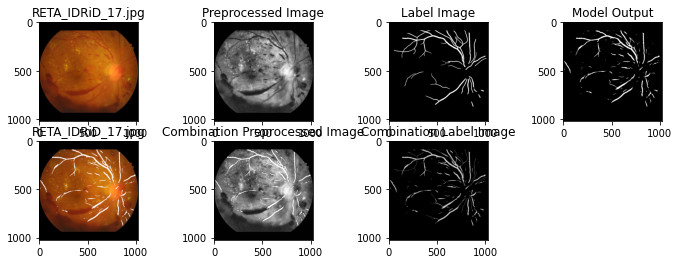

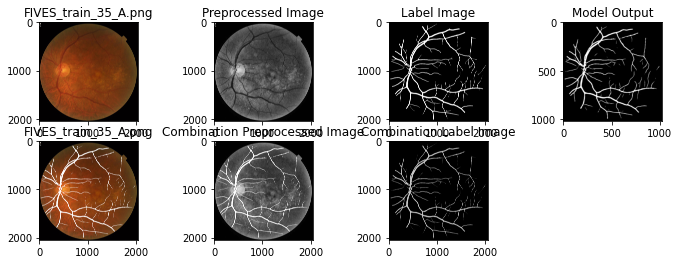

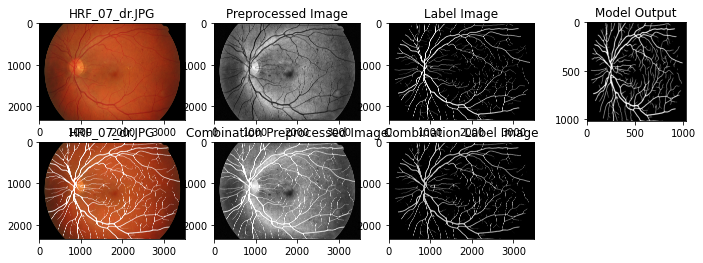

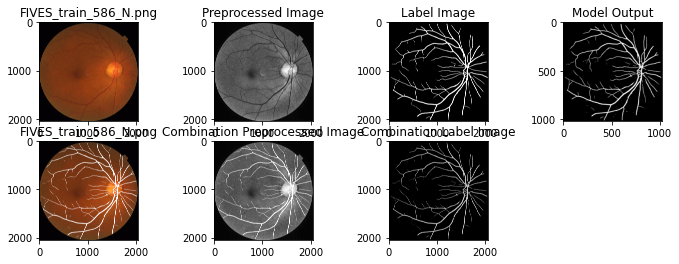

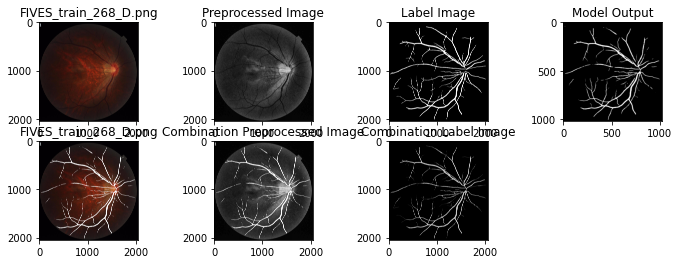

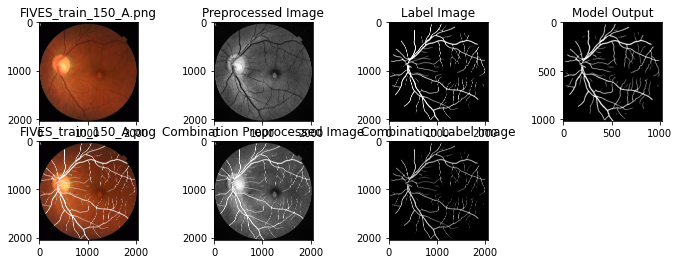

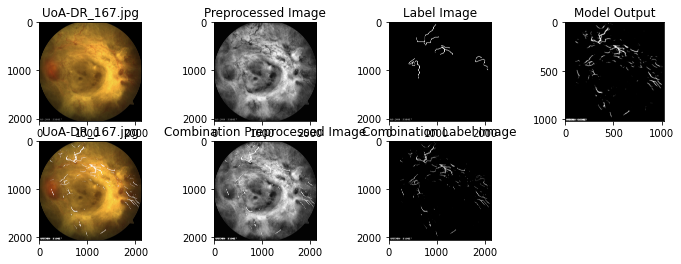

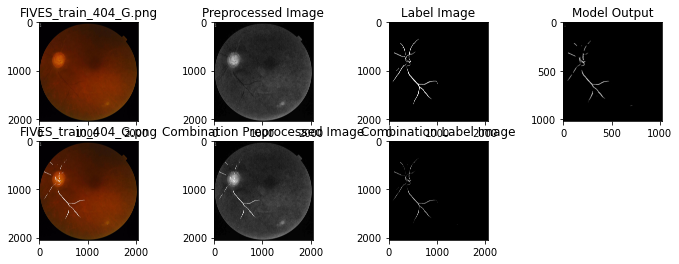

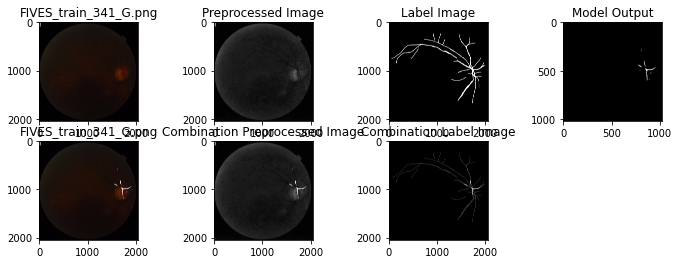

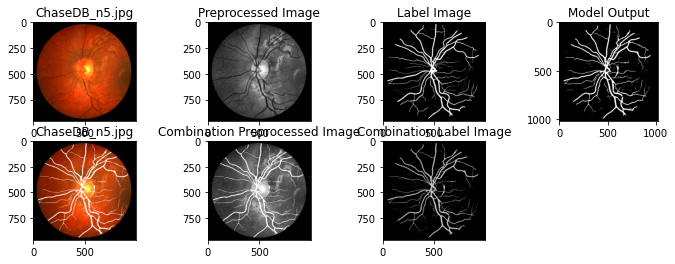

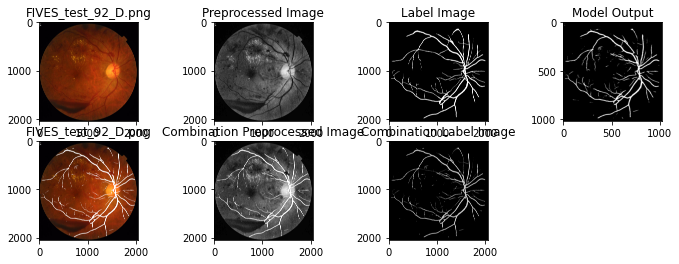

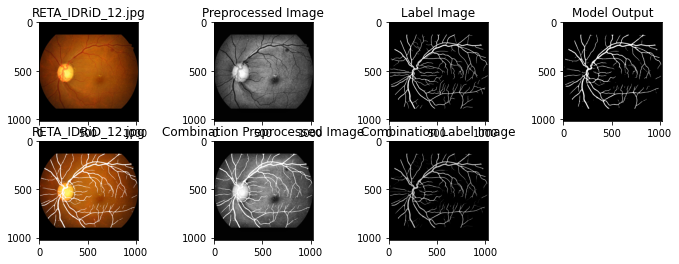

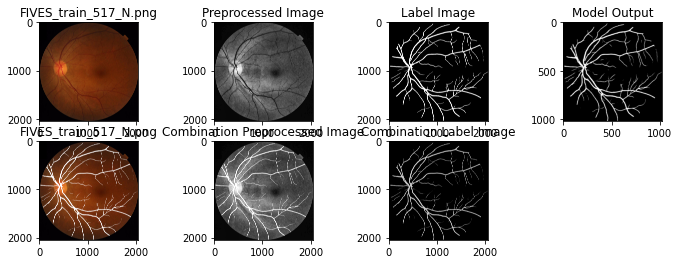

In [5]:
# Plot model result
num_images_to_select = 30
check_result.visualize_FG_result(model, num_images_to_select, SOURCE, INPUT_SHAPE, test_preproc)